In [1]:
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from numpy import nan as NA

During the course of doing data analysis and modeling, a significant amount of time
is spent on data preparation: loading, cleaning, transforming, and rearranging. Such
tasks are often reported to take up 80% or more of an analyst’s time. Sometimes the
way that data is stored in files or databases is not in the right format for a particular
task.

Fortunately, pandas, along with the
built-in Python language features, provides you with a high-level, flexible, and fast set
of tools to enable you to manipulate data into the right form.

##  Handling Missing Data

In [2]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [3]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

#### NOTE: The built-in Python None value is also treated as NA in object arrays:

In [4]:
string_data[0] = None

In [5]:
string_data

0         None
1    artichoke
2          NaN
3      avocado
dtype: object

In [6]:
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

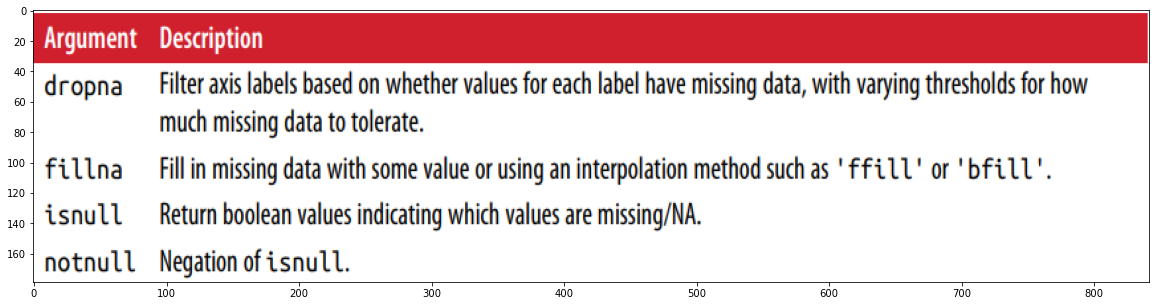

In [7]:
img = imread('C:/Users/HCL/Desktop/handling_missing_values.png')
plt.figure(figsize = (20,5))
plt.imshow(img, aspect = 'auto')

## Filtering Out Missing Data


In [8]:
data = pd.Series([1, NA, 3.5, NA, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [9]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

You may want to drop rows
or columns that are all NA or only those containing any NAs. dropna by default drops
any row containing a missing value:

In [10]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
 ....: [NA, NA, NA], [NA, 6.5, 3.]])

data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [11]:
cleaned = data.dropna()
cleaned

,0,1,2
0,1.0,6.5,3.0


Passing how='all' will only drop rows that are all NA:

In [12]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


To drop columns in the same way, pass axis=1:

In [13]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [14]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


A related way to filter out DataFrame rows tends to concern time series data. Suppose
you want to keep only rows containing a certain number of observations. You can
indicate this with the thresh argument:

In [15]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,0.951842,NaN,NaN
1,-2.223626,NaN,NaN
2,-0.522373,NaN,0.769176
3,-0.705777,NaN,1.447981
4,-0.008268,0.483725,0.499206
5,1.313395,0.246619,-0.467844
6,-1.115415,-0.000494,0.130143


In [16]:
 df.dropna()

,0,1,2
4,-0.008268,0.483725,0.499206
5,1.313395,0.246619,-0.467844
6,-1.115415,-0.000494,0.130143


In [17]:
df.dropna(thresh=2)

,0,1,2
2,-0.522373,NaN,0.769176
3,-0.705777,NaN,1.447981
4,-0.008268,0.483725,0.499206
5,1.313395,0.246619,-0.467844
6,-1.115415,-0.000494,0.130143


## Filling In Missing Data


Rather than filtering out missing data (and potentially discarding other data along
with it), you may want to fill in the “holes” in any number of ways. For most pur‐
poses, the fillna method is the workhorse function to use. Calling fillna with a
constant replaces missing values with that value:

In [18]:
df.fillna(0)

,0,1,2
0,0.951842,0.000000,0.000000
1,-2.223626,0.000000,0.000000
2,-0.522373,0.000000,0.769176
3,-0.705777,0.000000,1.447981
4,-0.008268,0.483725,0.499206
5,1.313395,0.246619,-0.467844
6,-1.115415,-0.000494,0.130143


Calling fillna with a dict, you can use a different fill value for each column:

In [19]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,0.951842,0.500000,0.000000
1,-2.223626,0.500000,0.000000
2,-0.522373,0.500000,0.769176
3,-0.705777,0.500000,1.447981
4,-0.008268,0.483725,0.499206
5,1.313395,0.246619,-0.467844
6,-1.115415,-0.000494,0.130143


#### NOTE: fillna returns a new object, but you can modify the existing object in-place:

In [20]:
_ = df.fillna(0, inplace=True)
df

,0,1,2
0,0.951842,0.000000,0.000000
1,-2.223626,0.000000,0.000000
2,-0.522373,0.000000,0.769176
3,-0.705777,0.000000,1.447981
4,-0.008268,0.483725,0.499206
5,1.313395,0.246619,-0.467844
6,-1.115415,-0.000494,0.130143


The same interpolation methods available for reindexing can be used with fillna:


In [21]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,0.372363,0.134402,-3.217214
1,-0.937205,1.135994,0.601562
2,1.696217,NaN,-0.341383
3,1.396049,NaN,0.247115
4,-0.755229,NaN,NaN
5,0.147429,NaN,NaN


In [22]:
df.fillna(method='ffill')

,0,1,2
0,0.372363,0.134402,-3.217214
1,-0.937205,1.135994,0.601562
2,1.696217,1.135994,-0.341383
3,1.396049,1.135994,0.247115
4,-0.755229,1.135994,0.247115
5,0.147429,1.135994,0.247115


In [23]:
df.fillna(method='ffill', limit = 2)

,0,1,2
0,0.372363,0.134402,-3.217214
1,-0.937205,1.135994,0.601562
2,1.696217,1.135994,-0.341383
3,1.396049,1.135994,0.247115
4,-0.755229,NaN,0.247115
5,0.147429,NaN,0.247115


###### With fillna you can do lots of other things with a little creativity. For example, you might pass the mean or median value of a Series:


In [24]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

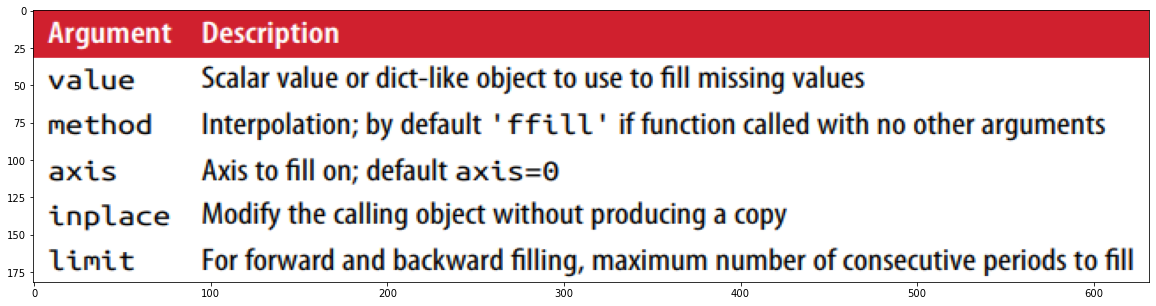

In [25]:
img = imread('C:/Users/HCL/Desktop/fillna_function_arguments.png')
plt.figure(figsize = (20,5))
plt.imshow(img, aspect = 'auto')

# Data Transformation

## Removing Duplicates


In [26]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
 ....: 'k2': [1, 1, 2, 3, 3, 4, 4]})

data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


The DataFrame method duplicated returns a boolean Series indicating whether each
row is a duplicate (has been observed in a previous row) or not:

In [27]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

Relatedly, drop_duplicates returns a DataFrame where the duplicated array is
False:


In [28]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


Both of these methods by default consider all of the columns; alternatively, you can
specify any subset of them to detect duplicates. Suppose we had an additional column
of values and wanted to filter duplicates only based on the 'k1' column:

In [29]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


duplicated and drop_duplicates by default keep the first observed value combina‐
tion. Passing keep='last' will return the last one:

In [30]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


## Transforming Data Using a Function or Mapping


For many datasets, you may wish to perform some transformation based on the val‐
ues in an array, Series, or column in a DataFrame. Consider the following hypotheti‐
cal data collected about various kinds of meat:

In [31]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
 ....: 'Pastrami', 'corned beef', 'Bacon',
 ....: 'pastrami', 'honey ham', 'nova lox'],
 ....: 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


Suppose you wanted to add a column indicating the type of animal that each food
came from. Let’s write down a mapping of each distinct meat type to the kind of
animal:

In [32]:
meat_to_animal = {
 'bacon': 'pig',
 'pulled pork': 'pig',
 'pastrami': 'cow',
 'corned beef': 'cow',
 'honey ham': 'pig',
 'nova lox': 'salmon'
}

The map method on a Series accepts a function or dict-like object containing a map‐
ping, but here we have a small problem in that some of the meats are capitalized and
others are not. Thus, we need to convert each value to lowercase using the str.lower
Series method:

In [33]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [34]:
data['animal'] = lowercased.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


##### Using map is a convenient way to perform element-wise transformations and other data cleaning–related operations.

## Replacing Values


Filling in missing data with the fillna method is a special case of more general value
replacement. As you’ve already seen, map can be used to modify a subset of values in
an object but replace provides a simpler and more flexible way to do so. Let’s con‐
sider this Series:

In [35]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

The -999 values might be sentinel values for missing data. To replace these with NA
values that pandas understands, we can use replace, producing a new Series (unless
you pass inplace=True):

In [36]:
data.replace(-999, NA)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

If you want to replace multiple values at once, you instead pass a list and then the
substitute value:

In [37]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

To use a different replacement for each value, pass a list of substitutes:


In [38]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

The argument passed can also be a dict:

In [39]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

##### The data.replace method is distinct from data.str.replace, which performs string substitution element-wise.

## Renaming Axis Indexes


Like values in a Series, axis labels can be similarly transformed by a function or map‐
ping of some form to produce new, differently labeled objects. You can also modify
the axes in-place without creating a new data structure. Here’s a simple example:

In [40]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
 ....: index=['Ohio', 'Colorado', 'New York'],
 ....: columns=['one', 'two', 'three', 'four'])

data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


Like a Series, the axis indexes have a map method:


In [41]:
transform = lambda x: x[:4].upper()

data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

You can assign to index, modifying the DataFrame in-place:

In [42]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


If you want to create a transformed version of a dataset without modifying the original, a useful method is rename:

In [43]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


Notably, rename can be used in conjunction with a dict-like object providing new values for a subset of the axis labels:

In [44]:
data.rename(index={'OHIO': 'INDIANA'},
 ....: columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


rename saves you from the chore of copying the DataFrame manually and assigning
to its index and columns attributes. Should you wish to modify a dataset in-place,
pass inplace=True:

In [45]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


## Discretization and Binning


Continuous data is often discretized or otherwise separated into “bins” for analysis.
Suppose you have data about a group of people in a study, and you want to group
them into discrete age buckets:

In [46]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

Let’s divide these into bins of 18 to 25, 26 to 35, 36 to 60, and finally 61 and older. To
do so, you have to use cut, a function in pandas:

In [47]:
bins = [18, 25, 35, 60, 100]

cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [48]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

Note that pd.value_counts(cats) are the bin counts for the result of pandas.cut.
Consistent with mathematical notation for intervals, a parenthesis means that the side
is open, while the square bracket means it is closed (inclusive). You can change which
side is closed by passing right=False:

In [49]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

You can also pass your own bin names by passing a list or array to the labels option:

In [50]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

##### If you pass an integer number of bins to cut instead of explicit bin edges, it will compute equal-length bins based on the minimum and maximum values in the data. Consider the case of some uniformly distributed data chopped into fourths:

In [51]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)

[(0.099, 0.32], (0.32, 0.54], (0.32, 0.54], (0.32, 0.54], (0.099, 0.32], ..., (0.76, 0.98], (0.099, 0.32], (0.76, 0.98], (0.54, 0.76], (0.099, 0.32]]
Length: 20
Categories (4, interval[float64]): [(0.099, 0.32] < (0.32, 0.54] < (0.54, 0.76] < (0.76, 0.98]]

The precision=2 option limits the decimal precision to two digits.

A closely related function, qcut, bins the data based on sample quantiles. Depending
on the distribution of the data, using cut will not usually result in each bin having the
same number of data points. Since qcut uses sample quantiles instead, by definition
you will obtain roughly equal-size bins:

In [52]:
data = np.random.randn(1000) # Normally distributed
cats = pd.qcut(data, 4) # Cut into quartiles

cats

[(0.00324, 0.678], (-0.674, 0.00324], (0.678, 3.411], (0.00324, 0.678], (0.00324, 0.678], ..., (0.00324, 0.678], (-0.674, 0.00324], (-3.061, -0.674], (0.00324, 0.678], (0.00324, 0.678]]
Length: 1000
Categories (4, interval[float64]): [(-3.061, -0.674] < (-0.674, 0.00324] < (0.00324, 0.678] < (0.678, 3.411]]

In [53]:
pd.value_counts(cats)

(0.678, 3.411]       250
(0.00324, 0.678]     250
(-0.674, 0.00324]    250
(-3.061, -0.674]     250
dtype: int64

Similar to cut you can pass your own quantiles (numbers between 0 and 1, inclusive):

In [54]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(0.00324, 1.3], (-1.195, 0.00324], (0.00324, 1.3], (0.00324, 1.3], (0.00324, 1.3], ..., (0.00324, 1.3], (-1.195, 0.00324], (-3.061, -1.195], (0.00324, 1.3], (0.00324, 1.3]]
Length: 1000
Categories (4, interval[float64]): [(-3.061, -1.195] < (-1.195, 0.00324] < (0.00324, 1.3] < (1.3, 3.411]]

## Detecting and Filtering Outliers


Filtering or transforming outliers is largely a matter of applying array operations.
Consider a DataFrame with some normally distributed data:

In [55]:
data = pd.DataFrame(np.random.randn(1000, 4))
data

,0,1,2,3
0,-0.135228,0.050254,-1.773650,0.911574
1,-1.553893,0.423754,0.881185,1.251118
2,-0.041529,-0.678697,0.168622,-0.007396
3,-1.233617,-0.616647,0.448108,1.520595
4,-2.724992,-1.826863,-0.858779,-0.844698
...,...,...,...,...
995,-0.346170,0.065208,0.719200,0.295470
996,-1.004826,-1.746344,0.635149,1.478376
997,1.273040,1.732342,0.685676,0.137525
998,0.921926,0.667629,-1.349477,-1.416922


In [56]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.073245,0.074166,-0.020203,0.021292
std,0.988073,1.007319,0.968465,1.018450
min,-3.005748,-4.293597,-3.193041,-3.444852
25%,-0.726806,-0.548518,-0.651751,-0.660602
50%,-0.079567,0.060084,-0.039596,0.018633
75%,0.657978,0.714535,0.587999,0.683852
max,2.626093,3.593864,3.333543,3.112919


Suppose you wanted to find values in one of the columns exceeding 3 in absolute
value:

In [57]:
col = data[2]
col[np.abs(col) > 3]

59    -3.193041
82    -3.032725
682    3.124787
894    3.333543
Name: 2, dtype: float64

To select all rows having a value exceeding 3 or –3, you can use the any method on a
boolean DataFrame:

In [58]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
7,0.699155,-4.293597,-0.649008,-0.849609
25,-1.007162,-0.246093,-0.463647,3.112919
30,1.648787,3.061390,0.333702,0.688768
59,0.700167,-1.240847,-3.193041,0.125713
82,-0.100415,0.438655,-3.032725,-2.150216
259,0.812138,3.177175,1.225965,1.066554
310,-3.005748,1.665981,0.116632,-0.474640
312,-0.520488,0.815454,-1.211777,-3.397058
357,2.213254,-0.932369,-0.711078,-3.444852
500,-0.570529,0.501623,0.203706,3.067986


Values can be set based on these criteria. Here is code to cap values outside the interval –3 to 3:


In [59]:
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.073239,0.074364,-0.020435,0.021997
std,0.988056,0.999091,0.966251,1.015099
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.726806,-0.548518,-0.651751,-0.660602
50%,-0.079567,0.060084,-0.039596,0.018633
75%,0.657978,0.714535,0.587999,0.683852
max,2.626093,3.000000,3.000000,3.000000


The statement np.sign(data) produces 1 and –1 values based on whether the values
in data are positive or negative:

In [60]:
np.sign(data).head()

,0,1,2,3
0,-1.0,1.0,-1.0,1.0
1,-1.0,1.0,1.0,1.0
2,-1.0,-1.0,1.0,-1.0
3,-1.0,-1.0,1.0,1.0
4,-1.0,-1.0,-1.0,-1.0


# String Manipulation

Most text operations are made simple with
the string object’s built-in methods. For more complex pattern matching and text
manipulations, regular expressions may be needed. pandas adds to the mix by enabling you to apply string and regular expressions concisely on whole arrays of data,
additionally handling the annoyance of missing data.

## String Object Methods

In many string munging and scripting applications, built-in string methods are sufficient. As an example, a comma-separated string can be broken into pieces with
split:

In [62]:
val = 'a,b, guido'
val.split(',')

['a', 'b', ' guido']

###### split is often combined with strip to trim whitespace (including line breaks):

In [64]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

A faster and more Pythonic way is to pass a
list or tuple to the join method on the string '::':

In [65]:
'::'.join(pieces)

'a::b::guido'

Other methods are concerned with locating substrings. Using Python’s in keyword is
the best way to detect a substring, though index and find can also be used:

In [66]:
'guido' in val

True

In [67]:
val.index(',')

1

In [68]:
val.find(':')

-1

###### Note the difference between find and index is that index raises an exception if the string isn’t found (versus returning –1):

In [69]:
val.index(':')

ValueError: substring not found

Relatedly, count returns the number of occurrences of a particular substring:

In [70]:
val.count(',')

2

replace will substitute occurrences of one pattern for another. It is commonly used
to delete patterns, too, by passing an empty string:

In [71]:
val.replace(',', '::')

'a::b:: guido'

In [72]:
val.replace(',', '')

'ab guido'

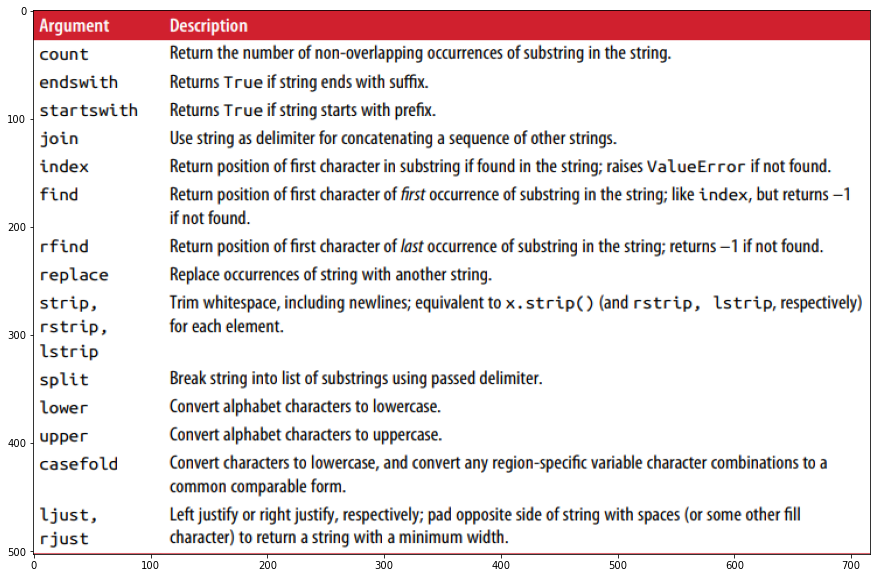

In [81]:
img = imread('C:/Users/HCL/Desktop/python built-in string methods.png')
plt.figure(figsize = (15,10))
plt.imshow(img, aspect = 'auto')

## Regular Expressions


Regular expressions provide a flexible way to search or match (often more complex)
string patterns in text. A single expression, commonly called a regex, is a string
formed according to the regular expression language. Python’s built-in re module is
responsible for applying regular expressions to strings; I’ll give a number of examples
of its use here.

The re module functions fall into three categories: pattern matching, substitution,
and splitting. Naturally these are all related; a regex describes a pattern to locate in the
text, which can then be used for many purposes. Let’s look at a simple example:

suppose we wanted to split a string with a variable number of whitespace characters
(tabs, spaces, and newlines). The regex describing one or more whitespace characters
is \s+:

In [82]:
import re

In [83]:
text = "foo bar\t baz \tqux"
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

###### When you call re.split('\s+', text), the regular expression is first compiled, and then its split method is called on the passed text. You can compile the regex yourself with re.compile, forming a reusable regex object:

In [84]:
regex = re.compile('\s+')

In [85]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

###### If, instead, you wanted to get a list of all patterns matching the regex, you can use the findall method:

In [86]:
regex.findall(text)

[' ', '\t ', ' \t']

###### NOTE: Creating a regex object with re.compile is highly recommended if you intend to apply the same expression to many strings; doing so will save CPU cycles.

match and search are closely related to findall. While findall returns all matches
in a string, search returns only the first match. More rigidly, match only matches at
the beginning of the string. As a less trivial example, let’s consider a block of text and
a regular expression capable of identifying most email addresses:

In [87]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

Using findall on the text produces a list of the email addresses:

In [88]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

search returns a special match object for the first email address in the text. For the
preceding regex, the match object can only tell us the start and end position of the
pattern in the string:

In [89]:
m = regex.search(text)
m    

<re.Match object; span=(5, 20), match='dave@google.com'>

In [90]:
text[m.start():m.end()]

'dave@google.com'

regex.match returns None, as it only will match if the pattern occurs at the start of the
string:

In [91]:
print(regex.match(text))

None


Relatedly, sub will return a new string with occurrences of the pattern replaced by the
a new string:

In [92]:
print(regex.sub('REDACTED', text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED

